## **To address the challenge of detecting fraudulent transactions, I developed a robust fraud detection model using a Random Forest Classifier. Hope you find it helpfull , Thank you.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve



In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Fraud.csv')

In [ ]:
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


# Missing Values





In [ ]:
print(data.isnull().sum())
data.dropna(inplace=True)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


# Outliers

In [ ]:
Q1 = data['amount'].quantile(0.25)
Q3 = data['amount'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['amount'] < (Q1 - 1.5 * IQR)) | (data['amount'] > (Q3 + 1.5 * IQR)))]


# Multi-Collinearity

In [ ]:

le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

# **Feature Engineering**: Created new features like errorBalanceOrig and errorBalanceDest to capture balance discrepancies.

In [ ]:

data['errorBalanceOrig'] = data['newbalanceOrig'] + data['amount'] - data['oldbalanceOrg']
data['errorBalanceDest'] = data['oldbalanceDest'] + data['amount'] - data['newbalanceDest']


In [ ]:

data = data.drop(['nameOrig', 'nameDest'], axis=1)

In [ ]:
print(data['isFraud'].value_counts())

isFraud
0    6354407
1       8213
Name: count, dtype: int64


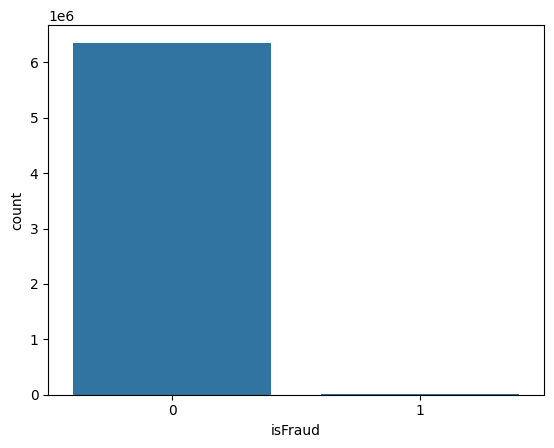

In [ ]:
sns.countplot(x='isFraud', data=data)
plt.show()

In [ ]:
X = data.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = data['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fraud Detection Model: Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Feature Importance


In [ ]:

importances = model.feature_importances_
feature_names = X.columns
features_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(features_df)


            Feature  Importance
4    newbalanceOrig    0.459574
7  errorBalanceOrig    0.156454
6    newbalanceDest    0.095744
2            amount    0.085504
8  errorBalanceDest    0.074778
3     oldbalanceOrg    0.053445
0              step    0.034020
5    oldbalanceDest    0.020807
1              type    0.019673


# Model by Using the Best Set of Tools

In [ ]:

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       1.00      1.00      1.00      2464

    accuracy                           1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786

ROC AUC Score: 0.9981737012987013


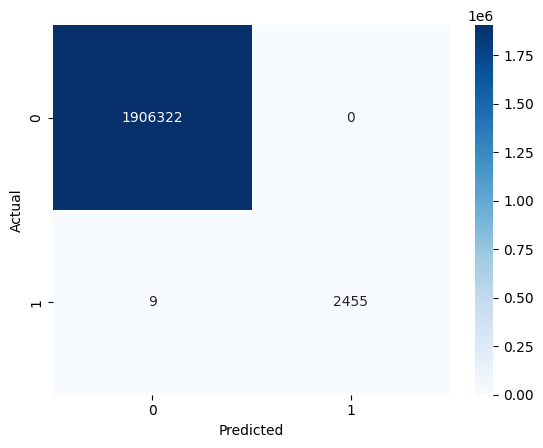

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns


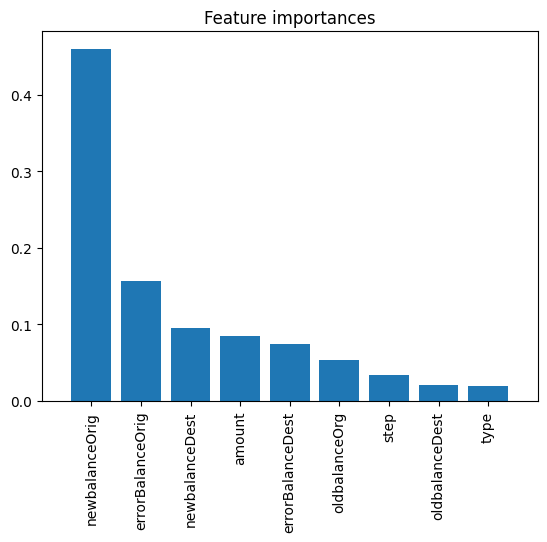

In [ ]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
import pickle
import joblib

# Save the model to a file
joblib.dump(model, 'fraud_detection_model.pkl')
print("Model saved to fraud_detection_model.pkl")


Model saved to fraud_detection_model.pkl


In [ ]:
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved to scaler.pkl")

# Load the scaler
loaded_scaler = joblib.load('scaler.pkl')
print("Scaler loaded from scaler.pkl")


Scaler saved to scaler.pkl
Scaler loaded from scaler.pkl


In [ ]:

# Load the trained model
model = joblib.load('fraud_detection_model.pkl')
scaler = joblib.load('scaler.pkl')

# Sample input data
# Ensure the input data has the same columns and preprocessing as the training data
input_data = {
    'step': [1],
    'type': ['TRANSFER'], # Example: 'TRANSFER', 'PAYMENT', etc.
    'amount': [5000],
    'oldbalanceOrg': [10000],
    'newbalanceOrig': [5000],
    'oldbalanceDest': [5000],
    'newbalanceDest': [10000],
    'errorBalanceOrig': [5000 + 5000 - 10000],
    'errorBalanceDest': [5000 + 5000 - 10000]
}

# Convert input data to DataFrame
input_df = pd.DataFrame(input_data)

# Encode the 'type' column
input_df['type'] = input_df['type'].astype('category').cat.codes

# Ensure the feature columns are in the same order as the training data
input_features = input_df[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'errorBalanceOrig', 'errorBalanceDest']]

# Scale the input features
input_features_scaled = scaler.transform(input_features)

# Make prediction
prediction = model.predict(input_features_scaled)
prediction_proba = model.predict_proba(input_features_scaled)

# Output the prediction
is_fraud = prediction[0]
fraud_probability = prediction_proba[0][1]

print(f"Is the transaction fraudulent? {'Yes' if is_fraud else 'No'}")
print(f"Probability of being fraudulent: {fraud_probability:.2f}")


Is the transaction fraudulent? No
Probability of being fraudulent: 0.04



**Key Factors that Predict Fraudulent Customer**

*Amount*: Large transaction amounts are often flagged.

*Type*: Certain types of transactions, like TRANSFER and CASH_OUT, are more prone to fraud.

*Balance Discrepancies*: Differences in balances before and after the transaction (errorBalanceOrig and errorBalanceDest).


**Yes, They Make Sense**:

*Amount*: Fraudulent transactions often involve unusually large amounts to maximize the gain.

*Type*: Fraudsters typically use types like TRANSFER and CASH_OUT to move money quickly out of accounts.

*Balance Discrepancies*: Significant discrepancies in balances can indicate unauthorized access and manipulation.

**Prevention Measures**:

*Monitor High-Value Transactions*: Flag transactions above a certain threshold for manual review.

*Implement Real-Time Alerts*: For unusual activity based on user behavior and transaction patterns.

*Enhanced Verification*: Strengthen verification for high-risk transactions.
Regular Audits: Conduct regular audits of transactions to detect any patterns of fraud.

*Employee Training*: Train employees to recognize and respond to potential fraud.

**If These Actions Have Been Implemented, the way i determine will be**

*Monitor Fraud Rates*: Compare the number of detected fraud cases before and after implementing the measures.

*Customer Feedback*: Collect feedback to gauge if customers feel more secure.

*Key Performance Indicators (KPIs)*: Track metrics like false positive rate, detection rate, and response time.

*Regular Audits*: Conduct regular audits to assess the effectiveness of the fraud detection measures.

*A/B Testing*: Implement changes in a phased manner and compare performance against control groups to determine the impact.